***I have taken around 600 NPIs where their deactivation date is available and reactivate date is null. I checked 30 samples(each sample has 30 NPIs) randomly using NPI registry API to identify there current status.***

***I found that most of the NPIs are deactive (~93%).***

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
os.chdir(r'C:\Users\GopinathPandit\OneDrive - ConcertAI\Python\Python_Practice\Deactive_Checks')

In [8]:
os.getcwd()

'C:\\Users\\GopinathPandit\\OneDrive - ConcertAI\\Python\\Python_Practice\\Deactive_Checks'

In [9]:
active_npi = {}
deactive_npi = {}

for i in range(1, 31):
    active_npi[f"df_{i}"] = pd.read_excel(f"NPI_Deactive_sample_{i}.xlsx", sheet_name= "NPI_Details")
    deactive_npi[f"df_{i}"] = pd.read_excel(f"NPI_Deactive_sample_{i}.xlsx", sheet_name= "Deactive-Invalid_NPI")
    

In [12]:
import pandas as pd

# Create an empty dataframe
data = pd.DataFrame(columns=['NPI', 'Active', 'Deactive'])

# Populate the dataframe with values from dictionaries
for i in active_npi.keys():
    active_count = active_npi[i].shape[0]
    deactive_count = deactive_npi[i].shape[0]
    data = pd.concat([data, pd.DataFrame({'NPI': [i], 'Active': [active_count], 'Deactive': [deactive_count]})], ignore_index=True)

# Display the dataframe
print(data)


      NPI Active Deactive
0    df_1      1       29
1    df_2      2       28
2    df_3      3       27
3    df_4      1       29
4    df_5      2       28
5    df_6      1       29
6    df_7      3       27
7    df_8      0       30
8    df_9      0       30
9   df_10      1       29
10  df_11      4       26
11  df_12      3       27
12  df_13      2       28
13  df_14      3       27
14  df_15      2       28
15  df_16      0       30
16  df_17      4       26
17  df_18      2       28
18  df_19      3       27
19  df_20      4       26
20  df_21      2       28
21  df_22      2       28
22  df_23      2       28
23  df_24      1       29
24  df_25      1       29
25  df_26      2       28
26  df_27      3       27
27  df_28      0       30
28  df_29      1       29
29  df_30      3       27


In [13]:
data['NPI'] = data['NPI'].str.replace('df','sample')

In [14]:
data['total'] = data['Active'] + data['Deactive']

In [15]:
data

,NPI,Active,Deactive,total
0,sample_1,1,29,30
1,sample_2,2,28,30
2,sample_3,3,27,30
3,sample_4,1,29,30
4,sample_5,2,28,30
5,sample_6,1,29,30
6,sample_7,3,27,30
7,sample_8,0,30,30
8,sample_9,0,30,30
9,sample_10,1,29,30


In [18]:
import scipy.stats as stats

# Extract the deactive counts from the dataframe
deactive_counts = data['Deactive']

# Calculate the sample mean and standard deviation
mean = deactive_counts.mean()
std_dev = deactive_counts.std()

# Calculate the standard error
std_error = std_dev / (len(deactive_counts) ** 0.5)

# Set the confidence level
confidence = 0.95

# Calculate the margin of error
margin_error = stats.t.ppf((1 + confidence) / 2, len(deactive_counts) - 1) * std_error

# Calculate the lower and upper bounds of the confidence interval
lower_bound = mean - margin_error
upper_bound = mean + margin_error

# Print the confidence interval
print("Confidence Interval (95%): [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))


Confidence Interval (95%): [27.62, 28.52]


In [23]:
plt.style.use('fivethirtyeight')

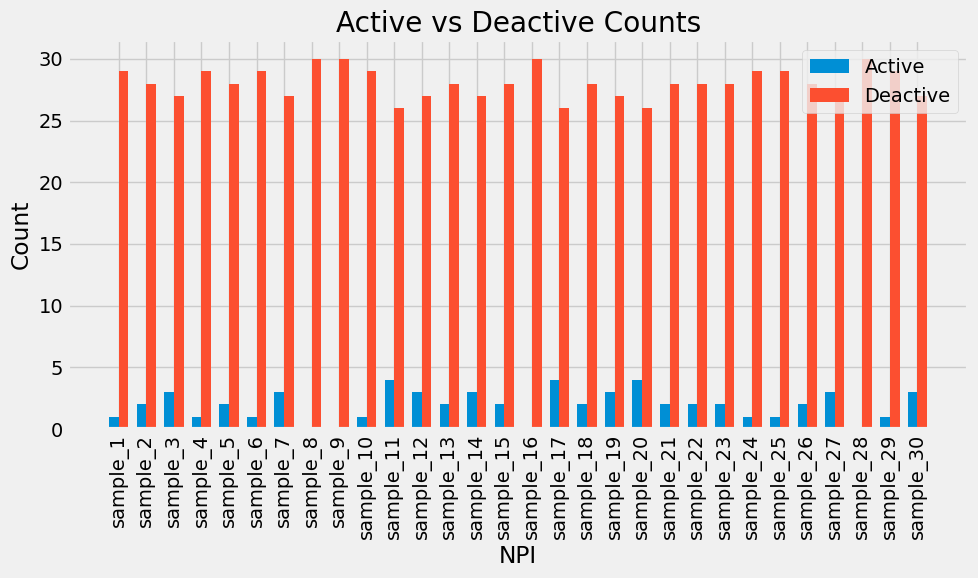

In [26]:
plt.figure(figsize=(10, 6))


x = range(len(data))
bar_width = 0.35


plt.bar(x, data['Active'], width=bar_width, label='Active')
plt.bar([i + bar_width for i in x], data['Deactive'], width=bar_width, label='Deactive')

plt.xticks([i + bar_width / 2 for i in x], data['NPI'],rotation='vertical')


plt.xlabel('NPI')
plt.ylabel('Count')
plt.title('Active vs Deactive Counts')
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
data.sum()

NPI         sample_1sample_2sample_3sample_4sample_5sample...
Active                                                     58
Deactive                                                  842
total                                                     900
dtype: object